In [1]:
!pip install diffusers transformers

# Encoder-Decoder Architecture

In [2]:
from tensorflow.keras.layers import LSTM, Embedding, Dense, Input
from tensorflow.keras.models import Model

# Text sequence-to-sequence model for translation
input_vocab_size = 10000
output_vocab_size = 10000
max_sequence_length = 20

# Encoder
encoder_inputs = Input(shape=(max_sequence_length,))
encoder_embedding = Embedding(input_vocab_size, 128)(encoder_inputs)
encoder_outputs, state_h, state_c = LSTM(128, return_state=True)(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(max_sequence_length,))
decoder_embedding = Embedding(output_vocab_size, 128)(decoder_inputs)
decoder_lstm = LSTM(128, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(output_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Model
seq2seq_model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
seq2seq_model.compile(optimizer='adam', loss='categorical_crossentropy')
seq2seq_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 20)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 20)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 20, 128)        │      1,280,000 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 20, 128)        │      1,280,000 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 128), (None,   │        131,584 │ embedding[0][0]        │
│                           │ 128), (None, 128)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, 20, 128),      │        131,584 │ embedding_1[0][0],     │
│                           │ (None, 128), (None,    │                │ lstm[0][1], lstm[0][2] │
│                           │ 128)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 20, 10000)      │      1,290,000 │ lstm_1[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 4,113,168 (15.69 MB)

 Trainable params: 4,113,168 (15.69 MB)

 Non-trainable params: 0 (0.00 B)

# Large-Language Models (LLMs)
LLMs like GPT, BERT, or GPT-4 are transformer-based architectures trained on massive text datasets. These models can perform tasks like summarization, Q&A, and text generation.

In [3]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load GPT-2 model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2")

# Generate text
input_text = "Once upon a time in a magical forest,"
inputs = tokenizer(input_text, return_tensors="pt")
outputs = model.generate(
    inputs["input_ids"],
    max_length=50,
    num_return_sequences=1,
    temperature=0.7,
    top_k=50
)

# Decode and print the generated text
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(f"Generated Text: {generated_text}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Generated Text: Once upon a time in a magical forest, a young girl named Lina was born. She was a beautiful girl, and she was the daughter of a noble family. She was the daughter of a noble family, and she was the daughter of a


# Diffusion Models
Diffusion models generate images by reversing a noise process. They progressively add noise to an image and learn to denoise it to create realistic images.

model_index.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/699 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/143M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--google--ddpm-cifar10-32/snapshots/267b167dc01f0e4e61923ea244e8b988f84deb80: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--google--ddpm-cifar10-32/snapshots/267b167dc01f0e4e61923ea244e8b988f84deb80.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

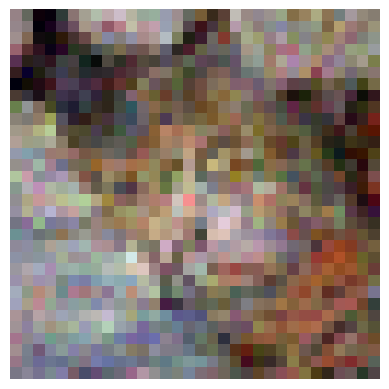

In [4]:
from diffusers import DDPMPipeline

# Load a pretrained diffusion model
model = DDPMPipeline.from_pretrained("google/ddpm-cifar10-32")

# Generate an image from random noise
image = model(num_inference_steps=50).images[0]

# Display the generated image
import matplotlib.pyplot as plt
plt.imshow(image)
plt.axis("off")
plt.show()

Is CUDA available: True
Device name: Tesla T4


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

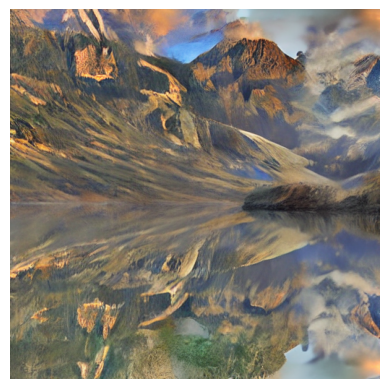

In [4]:
# Install required libraries in Google Colab
!pip install diffusers transformers accelerate torch torchvision matplotlib --quiet

from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

# Check if GPU is available
print("Is CUDA available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

model_id = "runwayml/stable-diffusion-v1-5"  # Stable Diffusion 1.5
pipeline = StableDiffusionPipeline.from_pretrained(model_id)

# Prompt for image generation
prompt = "A beautiful sunset over the mountains with a lake reflection"
image = pipeline(prompt, num_inference_steps=3, guidance_scale=7.5).images[0]

# Display the generated image
import matplotlib.pyplot as plt
plt.imshow(image)
plt.axis("off")
plt.show()

# Hands-on How to Use State-of-the-Art LLMs Using Python APIs

In [6]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load T5 model for summarization
tokenizer = AutoTokenizer.from_pretrained("t5-small")
model = AutoModelForSeq2SeqLM.from_pretrained("t5-small")

# Input text
text = """
The transformer architecture has been widely adopted in NLP tasks due to its ability to capture complex dependencies.
It has replaced RNNs in many scenarios and forms the backbone of models like GPT and BERT.
"""

# Prepare the input
inputs = tokenizer("summarize: " + text, return_tensors="pt", max_length=512, truncation=True)

# Generate summary
outputs = model.generate(inputs["input_ids"], max_length=50, min_length=20, length_penalty=2.0, num_beams=4)
summary = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(f"Summary: {summary}")

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Summary: transformer architecture has been widely adopted in NLP tasks due to its ability to capture complex dependencies. it has replaced RNNs in many scenarios and forms the backbone of models like GPT and BERT.


# Prompt Engineering
Prompt engineering is the art of crafting effective prompts to get the desired outputs from LLMs. This involves:

- **Few-shot prompting:** Providing examples in the prompt.
- **Instruction-based prompting:** Clear instructions.
- **Chain-of-thought prompting:** Asking the model to think step-by-step.

In [8]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the translation model
model_name = "Helsinki-NLP/opus-mt-en-fr"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Translation prompt
text_to_translate = "The weather is nice today."

# Tokenize the input text
inputs = tokenizer(text_to_translate, return_tensors="pt")

# Generate the translation
outputs = model.generate(inputs["input_ids"], max_length=40, num_beams=4, early_stopping=True)

# Decode and print the translated text
translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(f"Original: {text_to_translate}")
print(f"Translated: {translated_text}")

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Original: The weather is nice today.
Translated: Le temps est beau aujourd'hui.
